In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading property sales data file
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')

In [3]:
# calculating stats

avg_price = ppt_df.price.mean()
median_price = ppt_df.price.median()
std_price = ppt_df.price.std()
lowest_price = ppt_df.price.min()
highest_price = ppt_df.price.max()

lowest_priced_sub = ppt_df.loc[ppt_df['price']==lowest_price]['suburb'].values
highest_priced_sub = ppt_df.loc[ppt_df['price']==highest_price]['suburb'].values

In [4]:
# lowest & highest values property sold
print('---------------------------------------------------------------------------------')
print(f"The suburb, that has the lowest price property sold at AU$ {lowest_price:0,.0f} is {lowest_priced_sub[0]}.");
print(f"The suburb, that has the highest price property sold at AU$ {highest_price:0,.0f} is {highest_priced_sub[0]}.");
print('---------------------------------------------------------------------------------')

---------------------------------------------------------------------------------
The suburb, that has the lowest price property sold at AU$ 1,000 is Werribee.
The suburb, that has the highest price property sold at AU$ 7,573,100 is Craigieburn.
---------------------------------------------------------------------------------


In [5]:
# Calculation of IQR and Outliers


quartiles = ppt_df.price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of property price is: {lowerq:0,.0f}")
# print(f"The upper quartile of property price is: {upperq:0,.0f}")
# print(f"The interquartile range of property price is: {iqr:0,.0f}")
# print(f"The median of property price is: {quartiles[0.5]:0,.0f}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f"* Values below {lower_bound:0,.0f} could be outliers.")
# print(f"* Values above {upper_bound:0,.0f} could be outliers.")

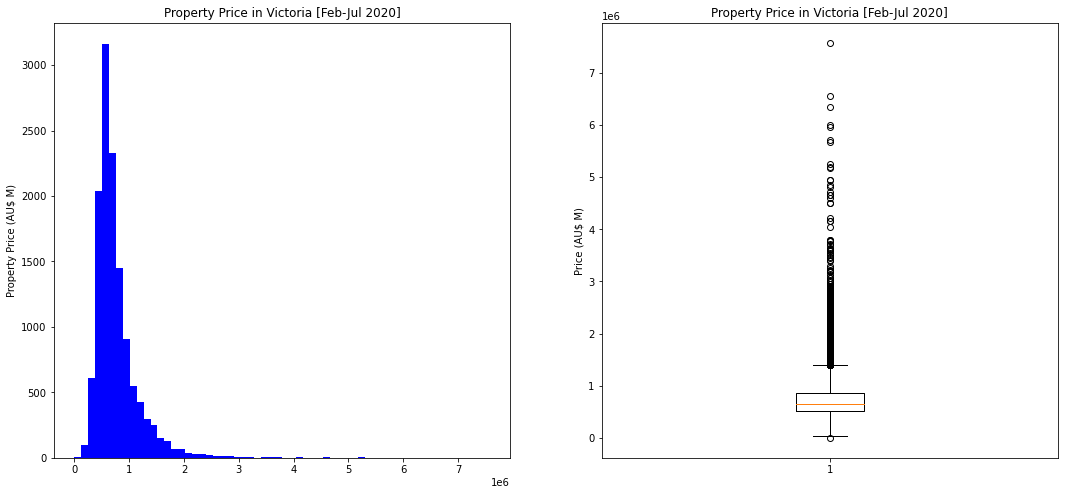

------------------------------------------------------------
The average of property price is: 767,924
The median of property price is: 652,000
The standard deviation of property price is: 435,507
------------------------------------------------------------
                                                                     --------------------------------------------------
                                                                      The lower quartile of property price is at 525,000
                                                                      The upper quartile of property price is at 872,500
                                                                      The interquartile range of property price is 347,500
                                                                      The median value of property price is 652,000
                                                                     ---------------------------------------------------
 * Values less than 

In [6]:
# histogram chart

plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

bins = 60
plt.hist(ppt_df.price, bins, facecolor='blue');
#plt.grid()
plt.ylabel("Property Price (AU$ M)")
plt.title('Property Price in Victoria [Feb-Jul 2020]')

# boxplot chart
plt.subplot(1, 2, 2)

plt.boxplot(ppt_df.price);
plt.title('Property Price in Victoria [Feb-Jul 2020]')
plt.ylabel('Price (AU$ M)')

plt.savefig('output/hist_box_ppty_price_covid.png')
plt.show()

print('------------------------------------------------------------')
print(f"The average of property price is: {avg_price:0,.0f}")
print(f"The median of property price is: {median_price:0,.0f}")
print(f"The standard deviation of property price is: {std_price:0,.0f}")                      
print('------------------------------------------------------------')

txt1 = "The lower quartile of property price is at"
txt2 = "The upper quartile of property price is at"
txt3 = "The interquartile range of property price is"
txt4 = "The median value of property price is"
txt5 = ' '
print(txt5.rjust(68),'--------------------------------------------------')
print(' ',txt1.rjust(110),f"{lowerq:0,.0f}" )
print(' ',txt2.rjust(110),f"{upperq:0,.0f}" )
print(' ',txt3.rjust(112), f"{iqr:0,.0f}" )
print(' ',txt4.rjust(105), f"{quartiles[0.5]:0,.0f}")
print(' ',txt5.rjust(66),'---------------------------------------------------')

print(f" * Values less than {lower_bound:0,.0f} or greater than {upper_bound:0,.0f} could be outliers.")


In [7]:
# removing the properties values less than $10,000
rm_index = ppt_df.loc[ppt_df.price < 5000]
ppt_df = ppt_df.drop(rm_index.index)

In [8]:
ppt_by_date = ppt_df.groupby('date_sold').count().reset_index()
ppt_by_date.head()

,date_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,2020-02-01,71,71,71,71,71,71,71,71,71,71,71,71
1,2020-02-02,18,18,18,18,18,18,18,18,18,18,18,18
2,2020-02-03,80,80,80,80,80,80,80,80,80,80,80,80
3,2020-02-04,93,93,93,93,93,93,93,93,93,93,93,93
4,2020-02-05,67,67,67,67,67,67,67,67,67,67,67,67


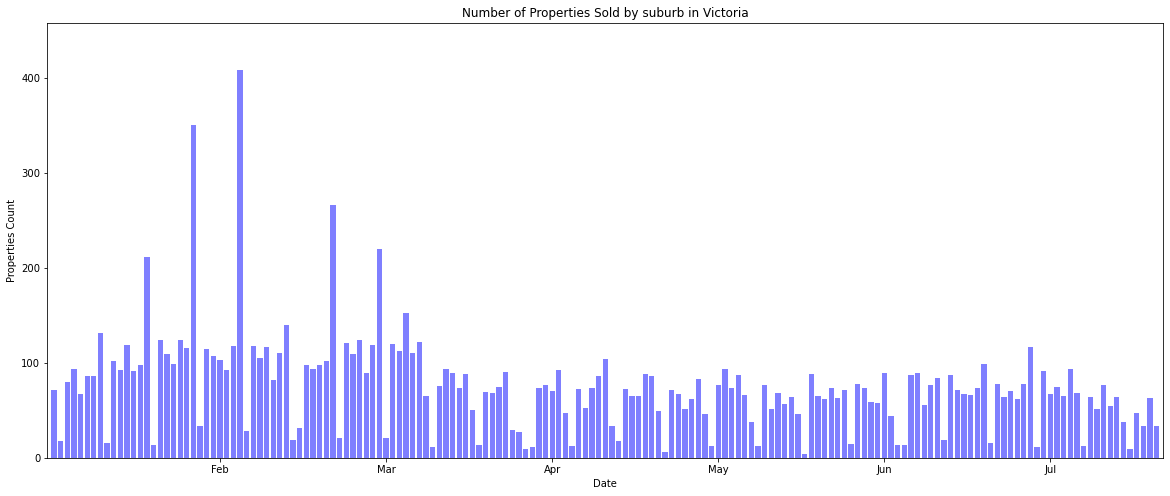

In [9]:
# property sold by date
y_axis = ppt_by_date.suburb
x_axis = ppt_by_date.date_sold

plt.figure(figsize=(20,8))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')

plt.savefig('output/num_ppty_sold_by_month.png')
plt.show()

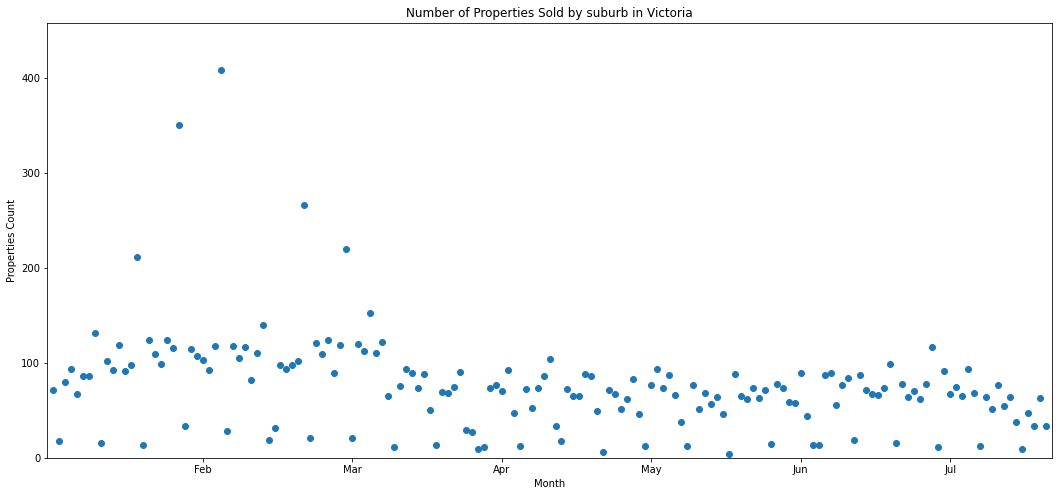

In [10]:
# scatter chart
x = ppt_by_date.date_sold
y = ppt_by_date.suburb

plt.figure(figsize=(18,8))
plt.scatter(x, y)
tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Month')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')

plt.savefig('output/scatter_ppty_sold_covid.png')
plt.show()

In [11]:
# grouping properties sold by month
ppt_by_date['date_sold'] = ppt_by_date['date_sold'].astype(str);
ppt_by_date['month_sold'] = ppt_by_date.date_sold.apply(lambda x: x[5:7])
ppt_by_month = ppt_by_date.groupby('month_sold').sum().reset_index()
ppt_by_month

,month_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,02,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274
1,03,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093
2,04,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793
3,05,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785
4,06,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959
5,07,850,850,850,850,850,850,850,850,850,850,850,850


In [12]:
covid_df = pd.read_excel('Resources/covid_data.xlsx')

In [13]:
covid_df['Date'] = covid_df['Date'].astype(str)
covid_df['Cases'] = covid_df['Cases'].astype(int)
covid_df['Month'] = covid_df.Date.apply(lambda x: x[x.rfind('2020')-2:x.rfind('2020')])

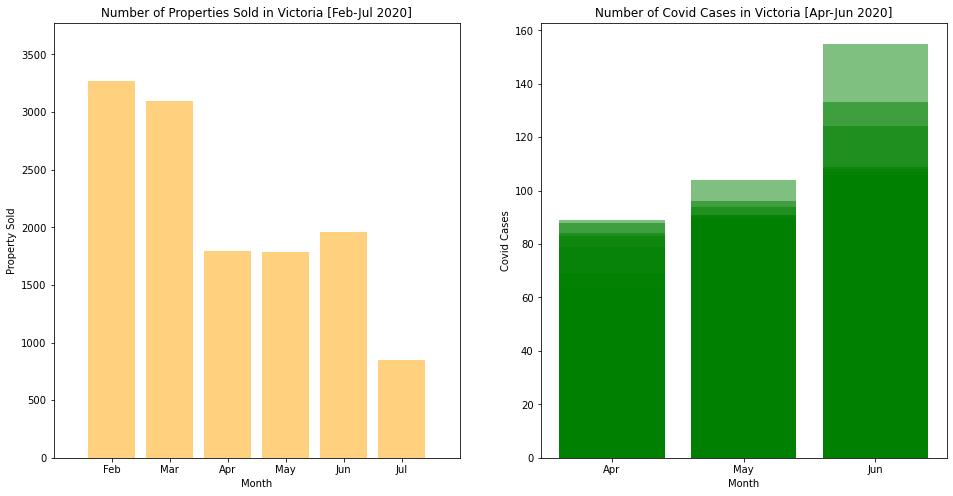

In [14]:
# property sold chart

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.month_sold
plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+500)
plt.xlabel('Month')
plt.ylabel('Property Sold')
plt.title('Number of Properties Sold in Victoria [Feb-Jul 2020]')

# covid cases chart
plt.subplot(1, 2, 2)
x_axis = covid_df['Month'].astype(int)
y_axis = covid_df.Cases
 
plt.bar(x_axis, y_axis, color='green', alpha=0.5, align="center")
tick_locations = [4, 5, 6]
plt.xticks(tick_locations, ["Apr", "May", "Jun"])
#plt.xlim(5, len(x_axis)+5)
#plt.ylim(0, max(y_axis) + 5)
plt.xlabel('Month')
plt.ylabel('Covid Cases')
plt.title('Number of Covid Cases in Victoria [Apr-Jun 2020]')
plt.savefig('output/bar_ppty_sold_in_covid.png')

plt.show()

In [15]:
sorted_ppt_df = ppt_df.sort_values(by=['date_sold','lga_pid'])
sorted_ppt_df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
13,45719,2020-02-01,940000.0,Clayton,Melbourne,VIC,-37.925969,145.117534,4,townhouse,VIC567,VIC104,3168.0
54,45760,2020-02-01,420000.0,Clayton,Melbourne,VIC,-37.913156,145.124122,2,unit,VIC567,VIC104,3168.0
65,45771,2020-02-01,1233000.0,Chadstone,Melbourne,VIC,-37.877231,145.104401,4,townhouse,VIC527,VIC104,3148.0
9,45715,2020-02-01,1320000.0,Yarrambat,Melbourne,VIC,-37.622742,145.143970,4,house,VIC2917,VIC106,3091.0
21,45727,2020-02-01,745000.0,Eltham,Melbourne,VIC,-37.706651,145.155218,3,house,VIC858,VIC106,3095.0


In [16]:
sorted_ppt_df = sorted_ppt_df[['date_sold','lga_pid','suburb','price']]
suburb_count = sorted_ppt_df['suburb'].value_counts().reset_index()
suburb_count = suburb_count.rename(columns={'index':'suburb', 'suburb':'property_sold'})
#suburb_count.head()

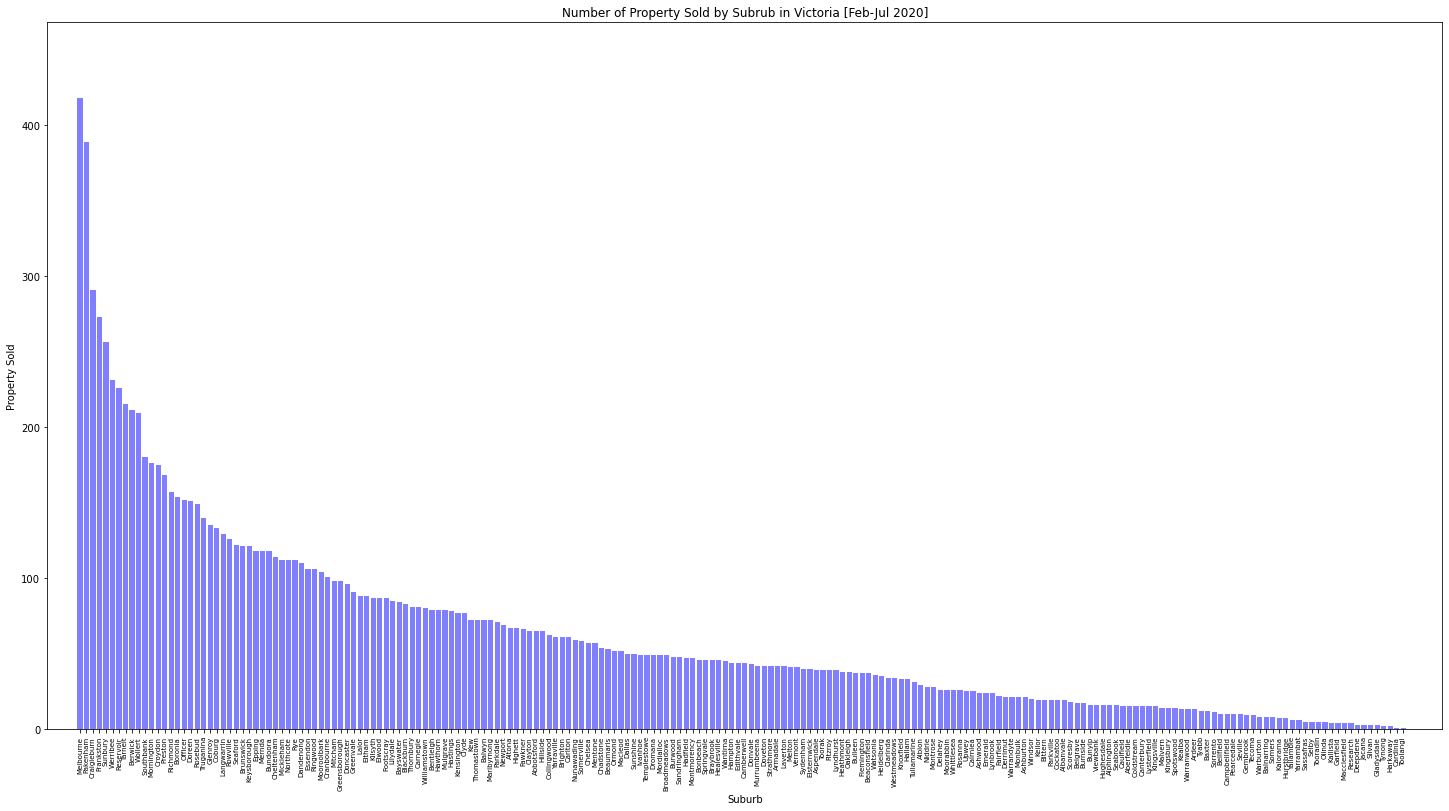

In [17]:
# plotting bar chart property sold by suburb during outbreak
x_axis = suburb_count.suburb 
y_axis = suburb_count.property_sold

plt.figure(figsize=(25,13)) 
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, x_axis, rotation='90', fontsize = 7 )
plt.xlim(-5, len(x_axis)+ 5)
plt.ylim(0, max(y_axis) + 50)
plt.xlabel('Suburb')
plt.ylabel('Property Sold')
plt.title('Number of Property Sold by Subrub in Victoria [Feb-Jul 2020]')

plt.savefig('output/ppty_sold_by_suburb.png')
plt.show()